## Developing a logistic regression model to predict funeral policy uptake for Ecosure Zimbabwe.

### Importing Modules

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

#### Create timestamp

In [57]:
# Timestamp to include in filenames
from datetime import datetime, timedelta
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")

#### Import Datasets

In [58]:
funeral_insurance_data = pd.read_csv('datasets/funeral_insurance_data_20230611141243.csv')
policy_data = pd.read_csv('datasets/policy_data_20230611141243.csv')

In [59]:
funeral_insurance_data.head()

,PolicyNumber,Age,Gender,Marital Status,Education Level,Income,Previous Insurance,Payment History,MemberType
0,LAG62016,34,Male,Divorced,High School,23120,Yes,Fair,H
1,LAG62016,13,Female,Single,High School,23120,Yes,Fair,D
2,LAG62016,23,Female,Divorced,College,23120,No,Fair,D
3,LAG62016,16,Female,Single,High School,23120,Yes,Fair,D
4,YSA38988,19,Male,Widowed,High School,198616,Yes,Poor,H


In [60]:
policy_data.head()

,PolicyNumber,SkippedPremiums,AutoDebit,DateCreated,DateClosed,PolicyProvince,Status
0,LAG62016,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
1,YSA38988,0,True,2019-09-14 14:12:36.867186,NaN,Mashonaland East,Active
2,BAC56047,2,True,2018-06-05 14:12:36.867254,NaN,Harare,Active
3,GCP05879,1,True,2017-05-18 14:12:36.867317,NaN,Harare,Active
4,LKJ27312,0,True,2021-01-01 14:12:36.867362,NaN,Harare,Active


#### Merge Datasets on PolicyNumber

In [61]:
merged_data = funeral_insurance_data.merge(policy_data, on='PolicyNumber', how='left')

In [62]:
# View the top 5 rows
merged_data.head()

,PolicyNumber,Age,Gender,Marital Status,Education Level,Income,Previous Insurance,Payment History,MemberType,SkippedPremiums,AutoDebit,DateCreated,DateClosed,PolicyProvince,Status
0,LAG62016,34,Male,Divorced,High School,23120,Yes,Fair,H,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
1,LAG62016,13,Female,Single,High School,23120,Yes,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
2,LAG62016,23,Female,Divorced,College,23120,No,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
3,LAG62016,16,Female,Single,High School,23120,Yes,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
4,YSA38988,19,Male,Widowed,High School,198616,Yes,Poor,H,0,True,2019-09-14 14:12:36.867186,NaN,Mashonaland East,Active


In [63]:
# View the bottom 5 rows
merged_data.tail()

,PolicyNumber,Age,Gender,Marital Status,Education Level,Income,Previous Insurance,Payment History,MemberType,SkippedPremiums,AutoDebit,DateCreated,DateClosed,PolicyProvince,Status
699783,BOO32533,23,Female,Single,High School,23547,Yes,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active
699784,BOO32533,13,Male,Single,High School,23547,No,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active
699785,BOO32533,23,Female,Single,College,23547,Yes,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active
699786,BOO32533,20,Female,Widowed,High School,23547,Yes,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active
699787,BOO32533,23,Female,Married,Bachelors Degree,23547,Yes,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active


#### Sample Null Rows and Unique Categorical Rows

In [64]:
null_rows = merged_data[merged_data['DateClosed'].isnull()]
print(null_rows)
# unique_values = merged_data['Education Level'].unique()
# print(unique_values)

       PolicyNumber  Age  Gender Marital Status   Education Level  Income  \
0          LAG62016   34    Male       Divorced       High School   23120   
1          LAG62016   13  Female         Single       High School   23120   
2          LAG62016   23  Female       Divorced           College   23120   
3          LAG62016   16  Female         Single       High School   23120   
4          YSA38988   19    Male        Widowed       High School  198616   
...             ...  ...     ...            ...               ...     ...   
699783     BOO32533   23  Female         Single       High School   23547   
699784     BOO32533   13    Male         Single       High School   23547   
699785     BOO32533   23  Female         Single           College   23547   
699786     BOO32533   20  Female        Widowed       High School   23547   
699787     BOO32533   23  Female        Married  Bachelors Degree   23547   

       Previous Insurance Payment History MemberType  SkippedPremiums  \
0 

In [65]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699788 entries, 0 to 699787
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   PolicyNumber        699788 non-null  object
 1   Age                 699788 non-null  int64 
 2   Gender              699788 non-null  object
 3   Marital Status      699788 non-null  object
 4   Education Level     699788 non-null  object
 5   Income              699788 non-null  int64 
 6   Previous Insurance  699788 non-null  object
 7   Payment History     560168 non-null  object
 8   MemberType          699788 non-null  object
 9   SkippedPremiums     699788 non-null  int64 
 10  AutoDebit           699788 non-null  bool  
 11  DateCreated         699788 non-null  object
 12  DateClosed          140473 non-null  object
 13  PolicyProvince      699788 non-null  object
 14  Status              699788 non-null  object
dtypes: bool(1), int64(3), object(11)
memory usage: 75.4

In [66]:
# View which columns are categorical
merged_data.select_dtypes(exclude=['int', 'float']).columns

Index(['PolicyNumber', 'Gender', 'Marital Status', 'Education Level',
       'Previous Insurance', 'Payment History', 'MemberType', 'AutoDebit',
       'DateCreated', 'DateClosed', 'PolicyProvince', 'Status'],
      dtype='object')

In [67]:
#main_df.isnull()
merged_data[merged_data.isnull().any(axis=1)]

,PolicyNumber,Age,Gender,Marital Status,Education Level,Income,Previous Insurance,Payment History,MemberType,SkippedPremiums,AutoDebit,DateCreated,DateClosed,PolicyProvince,Status
0,LAG62016,34,Male,Divorced,High School,23120,Yes,Fair,H,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
1,LAG62016,13,Female,Single,High School,23120,Yes,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
2,LAG62016,23,Female,Divorced,College,23120,No,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
3,LAG62016,16,Female,Single,High School,23120,Yes,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
4,YSA38988,19,Male,Widowed,High School,198616,Yes,Poor,H,0,True,2019-09-14 14:12:36.867186,NaN,Mashonaland East,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699783,BOO32533,23,Female,Single,High School,23547,Yes,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active
699784,BOO32533,13,Male,Single,High School,23547,No,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active
699785,BOO32533,23,Female,Single,College,23547,Yes,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active
699786,BOO32533,20,Female,Widowed,High School,23547,Yes,NaN,D,0,True,2016-09-01 14:12:43.874204,NaN,Harare,Active


In [68]:
merged_data.describe()

,Age,Income,SkippedPremiums
count,699788.000000,699788.000000,699788.000000
mean,25.793012,110290.004647,0.750174
std,16.142071,52025.057757,1.298734
min,12.000000,20000.000000,0.000000
25%,16.000000,65084.000000,0.000000
50%,20.000000,110541.000000,0.000000
75%,25.000000,155305.000000,1.000000
max,75.000000,200000.000000,4.000000


In [69]:
# merged_data.fillna(merged_data.mean(), inplace=True)
merged_data.head()

,PolicyNumber,Age,Gender,Marital Status,Education Level,Income,Previous Insurance,Payment History,MemberType,SkippedPremiums,AutoDebit,DateCreated,DateClosed,PolicyProvince,Status
0,LAG62016,34,Male,Divorced,High School,23120,Yes,Fair,H,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
1,LAG62016,13,Female,Single,High School,23120,Yes,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
2,LAG62016,23,Female,Divorced,College,23120,No,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
3,LAG62016,16,Female,Single,High School,23120,Yes,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
4,YSA38988,19,Male,Widowed,High School,198616,Yes,Poor,H,0,True,2019-09-14 14:12:36.867186,NaN,Mashonaland East,Active


#### Drop rows where age is below 18 and age is greater than 65

In [70]:
# Drop rows where age is below 18 and age is greater than 65

merged_data = merged_data[(merged_data['Age'] >= 18) & (merged_data['Age'] <= 65)]

In [71]:
merged_data.head()

,PolicyNumber,Age,Gender,Marital Status,Education Level,Income,Previous Insurance,Payment History,MemberType,SkippedPremiums,AutoDebit,DateCreated,DateClosed,PolicyProvince,Status
0,LAG62016,34,Male,Divorced,High School,23120,Yes,Fair,H,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
2,LAG62016,23,Female,Divorced,College,23120,No,Fair,D,0,True,2020-10-21 14:12:36.867109,NaN,Harare,Active
4,YSA38988,19,Male,Widowed,High School,198616,Yes,Poor,H,0,True,2019-09-14 14:12:36.867186,NaN,Mashonaland East,Active
5,YSA38988,18,Female,Married,Masters Degree,198616,No,Poor,D,0,True,2019-09-14 14:12:36.867186,NaN,Mashonaland East,Active
6,YSA38988,18,Female,Married,High School,198616,Yes,Poor,D,0,True,2019-09-14 14:12:36.867186,NaN,Mashonaland East,Active


#### Drop columns deemed not necessary

In [72]:
# Removing PolicyNumber
# Columns to be dropped
columns_to_drop = [
    'PolicyNumber',
    'Previous Insurance', 
    'Payment History',
    'SkippedPremiums',
    'AutoDebit',
    'DateCreated',
    'DateClosed'
]
# Drop the columns from the DataFrame
# main_df_final = merged_data.drop(columns=columns_to_drop)
# main_df_final.head()

merged_data.drop(columns=columns_to_drop,inplace=True)
merged_data.head()

,Age,Gender,Marital Status,Education Level,Income,MemberType,PolicyProvince,Status
0,34,Male,Divorced,High School,23120,H,Harare,Active
2,23,Female,Divorced,College,23120,D,Harare,Active
4,19,Male,Widowed,High School,198616,H,Mashonaland East,Active
5,18,Female,Married,Masters Degree,198616,D,Mashonaland East,Active
6,18,Female,Married,High School,198616,D,Mashonaland East,Active


#### Drop null values

In [73]:
merged_data = merged_data.dropna()

## Descriptive Statistics

In [74]:
merged_data.head()

,Age,Gender,Marital Status,Education Level,Income,MemberType,PolicyProvince,Status
0,34,Male,Divorced,High School,23120,H,Harare,Active
2,23,Female,Divorced,College,23120,D,Harare,Active
4,19,Male,Widowed,High School,198616,H,Mashonaland East,Active
5,18,Female,Married,Masters Degree,198616,D,Mashonaland East,Active
6,18,Female,Married,High School,198616,D,Mashonaland East,Active


In [75]:
statistics = merged_data.describe()
print(statistics)

                 Age         Income
count  415331.000000  415331.000000
mean       28.881266  110279.200548
std        13.578966   52040.878421
min        18.000000   20000.000000
25%        20.000000   65058.000000
50%        22.000000  110492.000000
75%        35.000000  155334.000000
max        65.000000  200000.000000


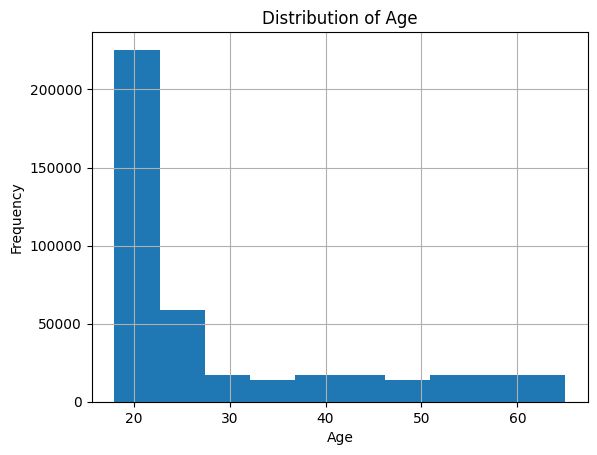

In [76]:
merged_data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


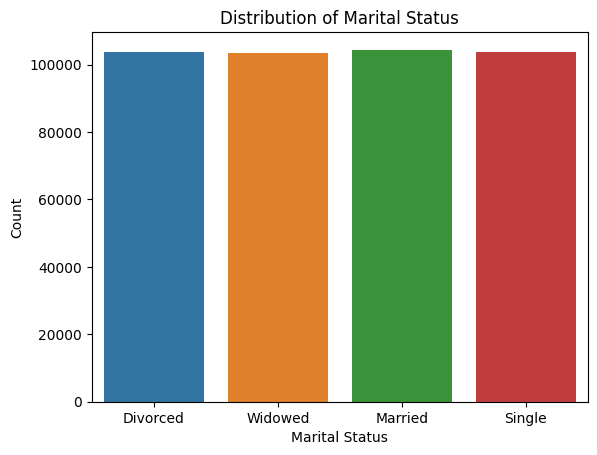

In [77]:
sns.countplot(x='Marital Status', data=merged_data)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()

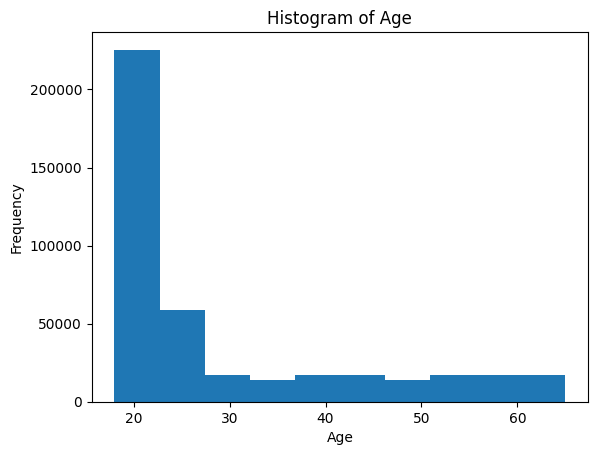

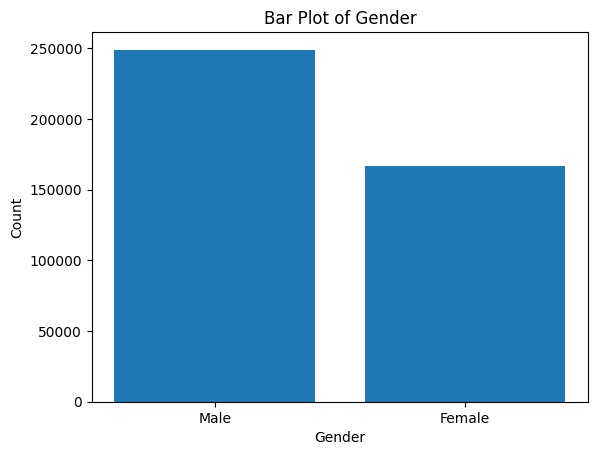

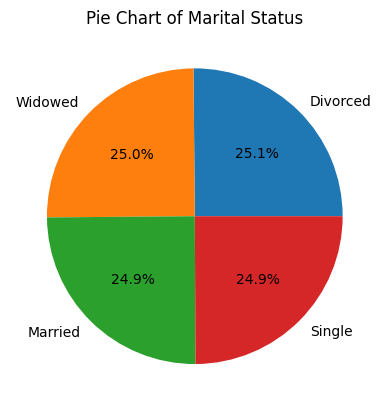

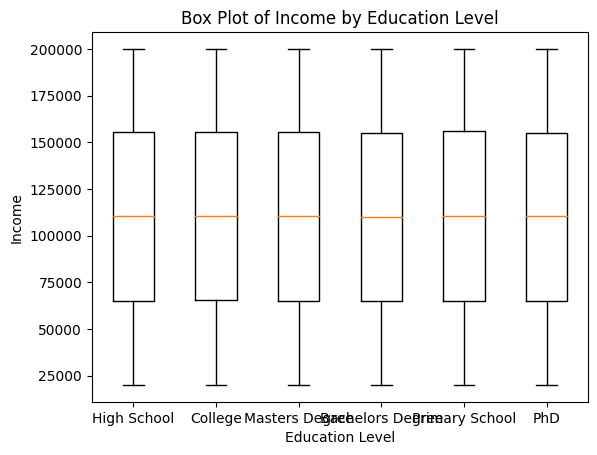

In [78]:
# Histogram of Age
plt.hist(merged_data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Bar plot of Gender
plt.bar(merged_data['Gender'].unique(), merged_data['Gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Gender')
plt.show()

# Pie chart of Marital Status
plt.pie(merged_data['Marital Status'].value_counts(), labels=merged_data['Marital Status'].unique(), autopct='%1.1f%%')
plt.title('Pie Chart of Marital Status')
plt.show()

# Box plot of Income by Education Level
plt.boxplot([merged_data[merged_data['Education Level'] == level]['Income'] for level in merged_data['Education Level'].unique()], labels=merged_data['Education Level'].unique())
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Box Plot of Income by Education Level')
plt.show()

## Feature Engineering

#### Create a new column 'Married'

In [79]:
# Create a new column 'Married' to store the encoded marital status
merged_data['Married'] = merged_data['Marital Status'].apply(lambda x: 1 if x == 'Married' else 0)


#### Mapping Categorical Values

In [80]:
gender_mapping = {'Male': 0, 'Female': 1}
merged_data['Gender'] = merged_data['Gender'].map(gender_mapping)

In [81]:
# Define the mapping of education levels to categories
education_categories = {
    'Primary School': 'Low',
    'High School': 'Medium',
    'College': 'High',
    'Bachelors Degree': 'High',
    'Masters Degree': 'High',
    'PhD': 'High'
}

# Create a new column 'EducationLevelCategory' to store the categorized education level
merged_data['Education Level'] = merged_data['Education Level'].map(education_categories)

# Create a dictionary to map education levels to numeric values
education_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Map the education levels to numeric values using the dictionary
merged_data['Education'] = merged_data['Education Level'].map(education_mapping)



In [82]:
# Categorize income into different levels
income_thresholds = [0, 50000, 100000, float('inf')]  # Define income thresholds

# Create a new column 'IncomeLevel' to store the categorized income level
merged_data['IncomeLevel'] = pd.cut(merged_data['Income'], bins=income_thresholds, labels=['Low', 'Medium', 'High'], right=False)

income_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Map the education levels to numeric values using the dictionary
merged_data['Income'] = merged_data['IncomeLevel'].map(income_mapping)


#### Define Thresholds and create new column 'PolicyUptake' based on the Thresholds

In [83]:
# Define the thresholds
age_threshold = 40
gender_threshold = 1  # Gender has a significant impact (e.g., 1 for female, 0 for male)
education_threshold = 2  # Higher education levels have a higher likelihood
income_threshold = 2  # Higher income levels have a higher likelihood
married_threshold = 1 # Married individuals have high likelihood

# Create the PolicyUptake column based on the thresholds
merged_data['PolicyUptake'] = 0  # Initialize all values as 0

# Apply the thresholds to set the PolicyUptake values
merged_data.loc[merged_data['Age'] >= age_threshold, 'PolicyUptake'] = 1
merged_data.loc[merged_data['Gender'] >= gender_threshold, 'PolicyUptake'] = 1
merged_data.loc[merged_data['Married'] == married_threshold, 'PolicyUptake'] = 1
merged_data.loc[merged_data['Education'] >= education_threshold, 'PolicyUptake'] = 1
merged_data.loc[(merged_data['Income'] >= income_threshold) & (merged_data['MemberType'] == 'H'), 'PolicyUptake'] = 1
merged_data.loc[(merged_data['MemberType'] == 'H') & (merged_data['Status'] == 'Active'), 'PolicyUptake'] = 1

### Perform Chi-square, ANOVA test and Correlation Tests for the Demographic Factors

In [84]:
# Perform chi-square test for categorical features
categorical_features = ['Gender', 'Married', 'Education Level', 'IncomeLevel']
for feature in categorical_features:
    contingency_table = pd.crosstab(merged_data[feature], merged_data['PolicyUptake'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test result for {feature}: p-value = {p_value}")

Chi-square test result for Gender: p-value = 0.0
Chi-square test result for Married: p-value = 0.0
Chi-square test result for Education Level: p-value = 0.0
Chi-square test result for IncomeLevel: p-value = 1.4218277579714946e-16


In [85]:
# Perform ANOVA or t-test for continuous features
continuous_features = ['Age']
for feature in continuous_features:
    policy_uptake_groups = [merged_data[merged_data['PolicyUptake'] == 0][feature], merged_data[merged_data['PolicyUptake'] == 1][feature]]
    f_statistic, p_value = stats.f_oneway(*policy_uptake_groups)
    print(f"ANOVA test result for {feature}: p-value = {p_value}")

ANOVA test result for Age: p-value = 0.0


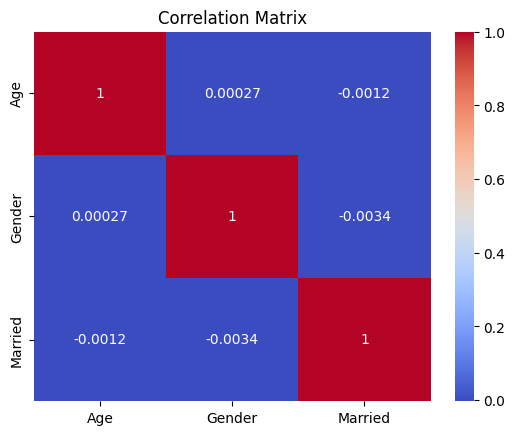

In [86]:
# Select the columns of interest for correlation analysis
columns_of_interest = ['Age', 'Gender', 'Married']

# Create a correlation matrix
correlation_matrix = merged_data[columns_of_interest].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the correlation matrix plot
plt.title('Correlation Matrix')
plt.show()

In [87]:
merged_data.head()
merged_data.tail()

,Age,Gender,Marital Status,Education Level,Income,MemberType,PolicyProvince,Status,Married,Education,IncomeLevel,PolicyUptake
699782,56,1,Widowed,Medium,0,H,Harare,Active,0,1,Low,1
699783,23,1,Single,Medium,0,D,Harare,Active,0,1,Low,1
699785,23,1,Single,High,0,D,Harare,Active,0,2,Low,1
699786,20,1,Widowed,Medium,0,D,Harare,Active,0,1,Low,1
699787,23,1,Married,High,0,D,Harare,Active,1,2,Low,1


In [88]:
merged_data.loc[merged_data['PolicyUptake'] == 0]

,Age,Gender,Marital Status,Education Level,Income,MemberType,PolicyProvince,Status,Married,Education,IncomeLevel,PolicyUptake
23,20,0,Single,Medium,1,D,Harare,Active,0,1,Medium,0
31,19,0,Widowed,Medium,2,D,Harare,Active,0,1,High,0
76,19,0,Single,Low,1,D,Harare,Closed,0,0,Medium,0
137,22,0,Divorced,Medium,1,D,Harare,Closed,0,1,Medium,0
150,19,0,Divorced,Medium,0,D,Matabeleland North,Active,0,1,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...
699664,22,0,Divorced,Medium,1,D,Harare,Closed,0,1,Medium,0
699686,18,0,Widowed,Medium,1,D,Harare,Closed,0,1,Medium,0
699743,23,0,Divorced,Medium,2,D,Mashonaland Central,Active,0,1,High,0
699759,23,0,Single,Medium,1,D,Bulawayo,Active,0,1,Medium,0


#### Drop more columns nolonger necessary

In [89]:
# Columns to be dropped
columns_to_drop = [
    'Marital Status',
    'Education', 
    'Income',
    'MemberType',
    'PolicyProvince',
    'Status'
]
# Drop the columns from the DataFrame

merged_data.drop(columns=columns_to_drop,inplace=True)
merged_data.head()
merged_data.tail()

,Age,Gender,Education Level,Married,IncomeLevel,PolicyUptake
699782,56,1,Medium,0,Low,1
699783,23,1,Medium,0,Low,1
699785,23,1,High,0,Low,1
699786,20,1,Medium,0,Low,1
699787,23,1,High,1,Low,1


#### One Hot Encoding on Categorical Data

In [90]:
# Perform One Hot Encoding on Categorical Data

# categorial = ['IncomeLevel','Education Level']
# main_df_final = pd.get_dummies(merged_data, columns=categorial, drop_first=True)
# main_df_final.head()

# Define the categorical columns to be one-hot encoded
categorical_columns = ['IncomeLevel', 'Education Level']

# Perform one-hot encoding for the categorical columns
encoded_features = pd.get_dummies(merged_data[categorical_columns])

# Merge the one-hot encoded features with the original dataframe
main_df_final = pd.concat([merged_data, encoded_features], axis=1)

# Drop the original categorical columns after encoding
main_df_final.drop(categorical_columns, axis=1, inplace=True)

main_df_final.head()


,Age,Gender,Married,PolicyUptake,IncomeLevel_Low,IncomeLevel_Medium,IncomeLevel_High,Education Level_High,Education Level_Low,Education Level_Medium
0,34,0,0,1,True,False,False,False,False,True
2,23,1,0,1,True,False,False,True,False,False
4,19,0,0,1,False,False,True,False,False,True
5,18,1,1,1,False,False,True,True,False,False
6,18,1,1,1,False,False,True,False,False,True


#### Save Encoded Column Names

In [91]:
column_names = main_df_final.columns.tolist()

# Create a DataFrame with the column names
columns_df = pd.DataFrame({'Column Names': column_names})

# Save the column names to a file
columns_df.to_csv(f"models/encoded_column_names_{timestamp}.csv", index=False)

print(columns_df)

             Column Names
0                     Age
1                  Gender
2                 Married
3            PolicyUptake
4         IncomeLevel_Low
5      IncomeLevel_Medium
6        IncomeLevel_High
7    Education Level_High
8     Education Level_Low
9  Education Level_Medium


### Splitting and Scaling Data

In [92]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['PolicyUptake'],axis=1).values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# We assigned those label values to our Y dataset
y = main_df_final['PolicyUptake'].values

#### Split it to a 70:30 Ratio Train:Test

In [93]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [94]:
print(X_test[0])

[ 1.26068176  0.81746595 -0.57947156 -0.44538723 -0.61709412  0.88877818
 -1.10823937 -0.2286848   1.22705416]


In [95]:
print(X_test)

[[ 1.26068176  0.81746595 -0.57947156 ... -1.10823937 -0.2286848
   1.22705416]
 [-0.72768999  0.81746595 -0.57947156 ...  0.90233214 -0.2286848
  -0.81495995]
 [ 1.40796855 -1.22329254 -0.57947156 ... -1.10823937 -0.2286848
   1.22705416]
 ...
 [-0.80133339  0.81746595  1.72571022 ...  0.90233214 -0.2286848
  -0.81495995]
 [-0.80133339  0.81746595 -0.57947156 ...  0.90233214 -0.2286848
  -0.81495995]
 [-0.4331164  -1.22329254  1.72571022 ... -1.10823937 -0.2286848
   1.22705416]]


In [96]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8
0,-0.801333,0.817466,-0.579472,2.245237,-0.617094,-1.125140,-1.108239,-0.228685,1.227054
1,0.818821,0.817466,-0.579472,-0.445387,-0.617094,0.888778,-1.108239,4.372831,-0.814960
2,0.008744,0.817466,1.725710,2.245237,-0.617094,-1.125140,0.902332,-0.228685,-0.814960
3,-0.654047,0.817466,-0.579472,-0.445387,-0.617094,0.888778,0.902332,-0.228685,-0.814960
4,-0.654047,0.817466,1.725710,-0.445387,-0.617094,0.888778,-1.108239,-0.228685,1.227054


In [97]:
df_train.describe()

,0,1,2,3,4,5,6,7,8
count,290731.000000,290731.000000,290731.000000,290731.000000,290731.000000,290731.000000,290731.000000,290731.000000,290731.000000
mean,0.000346,0.000358,0.001353,-0.000514,-0.001079,0.001356,-0.001914,0.000448,0.001745
std,1.000850,0.999929,1.000776,0.999539,0.999460,0.999841,1.000197,1.000930,1.000360
min,-0.801333,-1.223293,-0.579472,-0.445387,-0.617094,-1.125140,-1.108239,-0.228685,-0.814960
25%,-0.654047,-1.223293,-0.579472,-0.445387,-0.617094,-1.125140,-1.108239,-0.228685,-0.814960
50%,-0.506760,0.817466,-0.579472,-0.445387,-0.617094,0.888778,0.902332,-0.228685,-0.814960
75%,0.450604,0.817466,1.725710,-0.445387,1.620498,0.888778,0.902332,-0.228685,1.227054
max,2.659906,0.817466,1.725710,2.245237,1.620498,0.888778,0.902332,4.372831,1.227054


## Model Logistic Regression and Display Accuracy Metrics

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.04%
[[ 10131    156]
 [  1039 113274]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10287
           1       1.00      0.99      0.99    114313

    accuracy                           0.99    124600
   macro avg       0.95      0.99      0.97    124600
weighted avg       0.99      0.99      0.99    124600



## Save Model and Perform Sample Prediction

In [99]:
model_name = f"models/funeral_insurance_data_model_{timestamp}.joblib"
# Save the trained model for future use
joblib.dump(model, model_name)

['models/funeral_insurance_data_model_20230629181616.joblib']

In [100]:
scaler_name = f"models/funeral_insurance_data_scaler_{timestamp}.joblib"
# Save the scaler using joblib
joblib.dump(sc, scaler_name)

['models/funeral_insurance_data_scaler_20230629181616.joblib']

In [101]:
# Sample prediction data
input_df = pd.DataFrame({
    'Age': 45, 
    'Gender': 'Male', 
    'Education Level': 'High School', 
    'Married': 'Married', 
    'IncomeLevel': 800000.0}, index=[0])


input_df['Married'] = input_df['Married'].apply(lambda x: 1 if x == 'Married' else 0)
gender_mapping = {'Male': 0, 'Female': 1}
input_df['Gender'] = input_df['Gender'].map(gender_mapping)
education_categories = {
    'Primary School': 'Low',
    'High School': 'Medium',
    'College': 'High',
    'Bachelors Degree': 'High',
    'Masters Degree': 'High',
    'PhD': 'High'
}
# Create a new column 'Education Level' to store the categorized education level
input_df['Education Level'] = input_df['Education Level'].map(education_categories)

income_thresholds = [0, 50000, 100000, float('inf')]  # Define income thresholds

# Create a new column 'IncomeLevel' to store the categorized income level
input_df['IncomeLevel'] = pd.cut(input_df['IncomeLevel'], bins=income_thresholds, labels=['Low', 'Medium', 'High'], right=False)


# Define the categorical columns to be one-hot encoded
categorical_columns = ['IncomeLevel', 'Education Level']

# Perform one-hot encoding for the categorical columns
encoded_features = pd.get_dummies(input_df[categorical_columns])

# Merge the one-hot encoded features with the original dataframe
input_df_final = pd.concat([input_df, encoded_features], axis=1)

# Drop the original categorical columns after encoding
input_df_final.drop(categorical_columns, axis=1, inplace=True)

# Read the column names from the file
column_names_df = pd.read_csv('models/encoded_column_names_20230612172053.csv')

# Get the column names as a list
saved_column_names = column_names_df['Column Names'].values.tolist()

# Get the missing columns
missing_columns = list(set(saved_column_names) - set(input_df_final.columns))

# Add the missing columns to the input DataFrame with zeros as values
for column in missing_columns:
    if column != 'PolicyUptake':
        input_df_final[column] = 0


input_df_final = sc.transform(input_df_final)

# Reshape data for input into our model predict function
input_df_final = input_df_final.reshape(1, -1)

/home/tmandinyenya/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#### Make a prediction using the preprocessed input

In [102]:
# Make a prediction using the preprocessed input
prediction = model.predict(input_df_final)

# Convert the prediction to a human-readable label
prediction_label = 'Yes' if prediction == 1 else 'No'

print(prediction_label)

Yes
